# 1- First Task

In [ ]:
import pandas as pd
import numpy as np
! pip install pandas_profiling==2.7.1
from pandas_profiling import ProfileReport

In [ ]:
df = pd.read_csv("/content/dataset.csv")

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12215.000000,12225.000000,12196.000000,12204.000000,12196.000000,12191.000000,12216.000000,12208.000000,12222.000000,12201.000000,12214.000000,12218.000000,12204.000000,12179.000000
mean,2.315759,80.741179,0.502706,34.733067,31.814447,1192.220406,0.022231,0.043050,5.869171,0.061011,2.124857,2.358324,3.146673,4.069464
std,3.319969,176.660783,1.271342,141.364602,44.607472,1905.738105,0.048569,0.048543,18.545277,0.198111,0.912112,1.716343,2.401164,4.030383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.050000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,598.450000,0.003098,0.025183,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.750000,0.000000,0.000000,38.000000,1464.986003,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000



#2- filling missing values

In [ ]:
import random

In [ ]:
df.isna().sum()

Administrative             115
Administrative_Duration    105
Informational              134
Informational_Duration     126
ProductRelated             134
ProductRelated_Duration    139
BounceRates                114
ExitRates                  122
PageValues                 108
SpecialDay                 129
Month                      118
OperatingSystems           116
Browser                    112
Region                     126
TrafficType                151
VisitorType                116
Weekend                    131
Revenue                      0
dtype: int64

In [ ]:
df['Administrative'].fillna(random.choice(df['Administrative'][df['Administrative'].notna()]),inplace = True)
df["Administrative_Duration"].fillna(random.choice(df['Administrative_Duration'][df['Administrative_Duration'].notna()]),inplace = True)
df["Informational"].fillna(random.choice(df['Informational'][df['Informational'].notna()]),inplace = True)
df["Informational_Duration"].fillna(random.choice(df['Informational_Duration'][df['Informational_Duration'].notna()]),inplace = True)
df["ProductRelated"].fillna(random.choice(df['ProductRelated'][df['ProductRelated'].notna()]),inplace = True)
df["ProductRelated_Duration"].fillna(random.choice(df['ProductRelated_Duration'][df['ProductRelated_Duration'].notna()]),inplace = True)
df["BounceRates"].fillna(random.choice(df['BounceRates'][df['BounceRates'].notna()]),inplace = True)
df["ExitRates"].fillna(random.choice(df['ExitRates'][df['ExitRates'].notna()]),inplace = True)
df["PageValues"].fillna(random.choice(df['PageValues'][df['PageValues'].notna()]),inplace = True)
df["SpecialDay"].fillna(random.choice(df['SpecialDay'][df['SpecialDay'].notna()]),inplace = True)

In [ ]:
df.OperatingSystems.fillna(2,inplace = True)
df.Month.fillna('May',inplace = True)
df.Browser.fillna(2,inplace = True)
df.Region.fillna(1,inplace = True)
df.TrafficType.fillna(2,inplace = True)
df.VisitorType.fillna('Returning_Visitor',inplace = True)
df.Weekend.fillna(False, inplace = True)

In [ ]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#3- pandas_profiling



In [ ]:
profile = ProfileReport(df)

In [ ]:
profile.to_file('onilne_shoppers_profile.html')

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#4- categorical to numerical

In [ ]:
df = pd.get_dummies(df, columns=['OperatingSystems', 'Browser', 'Region','TrafficType','VisitorType','Weekend','Month',], drop_first=True)

In [ ]:
df.shape

(12330, 69)

In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue',
       'OperatingSystems_2.0', 'OperatingSystems_3.0', 'OperatingSystems_4.0',
       'OperatingSystems_5.0', 'OperatingSystems_6.0', 'OperatingSystems_7.0',
       'OperatingSystems_8.0', 'Browser_2.0', 'Browser_3.0', 'Browser_4.0',
       'Browser_5.0', 'Browser_6.0', 'Browser_7.0', 'Browser_8.0',
       'Browser_9.0', 'Browser_10.0', 'Browser_11.0', 'Browser_12.0',
       'Browser_13.0', 'Region_2.0', 'Region_3.0', 'Region_4.0', 'Region_5.0',
       'Region_6.0', 'Region_7.0', 'Region_8.0', 'Region_9.0',
       'TrafficType_2.0', 'TrafficType_3.0', 'TrafficType_4.0',
       'TrafficType_5.0', 'TrafficType_6.0', 'TrafficType_7.0',
       'TrafficType_8.0', 'TrafficType_9.0', 'TrafficType_10.0',
       'TrafficType_11.0', 'TrafficType_12.0', 'TrafficType_13.0',
      


#5- Correlation Matrix


In [ ]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,OperatingSystems_2.0,OperatingSystems_3.0,OperatingSystems_4.0,OperatingSystems_5.0,OperatingSystems_6.0,OperatingSystems_7.0,OperatingSystems_8.0,Browser_2.0,Browser_3.0,Browser_4.0,Browser_5.0,Browser_6.0,Browser_7.0,Browser_8.0,Browser_9.0,Browser_10.0,Browser_11.0,Browser_12.0,Browser_13.0,Region_2.0,Region_3.0,Region_4.0,Region_5.0,Region_6.0,Region_7.0,Region_8.0,Region_9.0,TrafficType_2.0,TrafficType_3.0,TrafficType_4.0,TrafficType_5.0,TrafficType_6.0,TrafficType_7.0,TrafficType_8.0,TrafficType_9.0,TrafficType_10.0,TrafficType_11.0,TrafficType_12.0,TrafficType_13.0,TrafficType_14.0,TrafficType_15.0,TrafficType_16.0,TrafficType_17.0,TrafficType_18.0,TrafficType_19.0,TrafficType_20.0,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
Administrative,1.000000,0.590398,0.371631,0.254644,0.426920,0.366025,-0.221287,-0.311635,0.100988,-0.094643,0.136695,0.017670,0.001406,-0.007255,-0.010843,-0.008484,0.009192,-0.017875,0.046852,-0.026133,-0.024787,-0.001958,-0.013741,0.009570,-0.029859,-0.000800,-0.000941,-0.010843,-0.003391,-0.010786,0.008454,0.018944,-0.002187,0.007192,-0.021972,0.002646,0.010130,-0.013142,0.114905,-0.070281,0.005251,0.050980,-0.014733,0.011569,0.026497,-0.006033,-0.001131,-0.024053,-0.006239,-0.037191,0.010697,-0.018635,0.003325,-0.006239,-0.001670,-0.009900,-0.010373,-0.020719,-0.021961,0.026591,-0.014456,-0.065616,0.006970,-0.002418,-0.055662,-0.063897,0.053074,0.091703,0.057127
Administrative_Duration,0.590398,1.000000,0.292863,0.233408,0.280730,0.340753,-0.139861,-0.200733,0.068289,-0.070797,0.091089,-0.022088,0.029681,-0.022094,-0.007231,-0.002511,0.009747,-0.010072,0.016393,-0.006763,-0.017745,-0.009176,0.001035,-0.010458,-0.012627,0.015643,-0.001146,-0.007231,0.003653,-0.003010,0.010304,0.004450,0.003664,0.010090,-0.016361,-0.003320,0.007347,-0.009583,0.096531,-0.059293,-0.008930,0.021318,-0.010856,0.001580,0.020746,-0.004879,-0.006527,-0.015105,-0.004201,-0.019263,0.035716,-0.001460,0.018805,-0.004201,-0.001678,-0.008899,-0.005624,-0.009352,-0.023011,0.016775,-0.002802,-0.043328,-0.002306,-0.019812,-0.019724,-0.039764,0.030044,0.054405,0.028479
Informational,0.371631,0.292863,1.000000,0.606965,0.366372,0.376700,-0.115082,-0.161101,0.046607,-0.048808,0.094501,-0.001432,0.019036,-0.022613,-0.005764,-0.002365,0.001397,-0.017899,0.040438,-0.017319,-0.026456,-0.017943,-0.007890,-0.001390,-0.029443,-0.003539,-0.005113,-0.005764,-0.006692,-0.018268,-0.016545,-0.000155,0.002455,-0.007568,0.001355,-0.013210,-0.006756,-0.024474,0.124431,-0.072110,-0.002314,-0.002598,-0.008381,0.001835,-0.000029,-0.007573,0.002829,-0.013697,-0.003539,-0.024656,0.042530,-0.003348,-0.006130,-0.003539,-0.004441,-0.005964,-0.020626,-0.021120,0.055538,0.037708,0.003841,-0.039968,0.003564,0.008652,-0.028344,-0.037273,0.061261,-0.003117,0.008497
Informational_Duration,0.254644,0.233408,0.606965,1.000000,0.279025,0.340917,-0.073611,-0.104272,0.030038,-0.031208,0.069849,0.022959,-0.003071,-0.016275,-0.005052,0.000853,-0.003484,-0.011508,0.035913,-0.009700,-0.016846,-0.012029,0.003794,0.006366,-0.023274,-0.002201,0.000289,-0.005052,-0.005332,-0.016575,0.003348,0.000381,0.004637,-0.003227,-0.008567,-0.017306,-0.001573,-0.021602,0.099806,-0.047705,-0.008388,-0.016179,-0.007220,-0.001343,0.002682,0.000451,-0.006827,-0.014265,-0.002201,-0.019488,0.033380,-0.011396,-0.003812,-0.002201,-0.001575,0.024060,-0.010970,-0.013440,0.044778,0.025262,0.009802,-0.027724,0.015593,-0.015032,-0.012106,-0.031353,0.037291,0.006398,0.001070
ProductRelated,0.426920,0.280730,0.366372,0.279025,1.000000,0.839160,-0.201346,-0.286709,0.055914,-0.025032,0.158132,0.120915,-0.058156,0.019059,-0.009887,-0.009468,-0.006478,-0.029856,0.093589,-0.033811,-0.007238,-0.001736,-0.005671,-0.009075,-0.031976,-0.0

#5-2 split train, test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_cols = ['Administrative', 'ProductRelated',
              'PageValues', 'SpecialDay',
              'Weekend_True']
test_col = 'Revenue'

In [ ]:
X = df[train_cols]

In [ ]:
y = df.Revenue

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#6- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


In [ ]:
cnf_matrix

array([[2496,   63],
       [ 345,  179]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

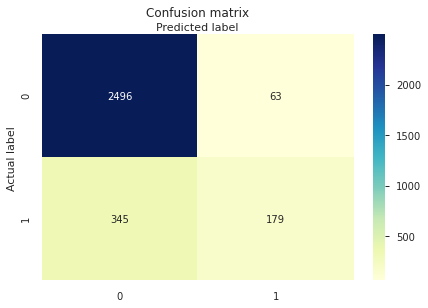

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8676613687966267
Precision: 0.7396694214876033
Recall: 0.3416030534351145


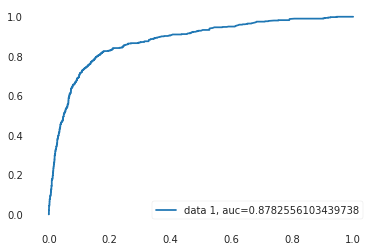

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()